In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', 20)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', 1000)

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#import the data
fell_df = pd.read_csv('../Data/df183_with_country_area.csv', index_col = [0])

fell_df.head()

name   id                  Type        group  mass (g)    year  \
0    Aachen    1             Chondrite           L5      21.0  1880.0   
1    Aarhus    2             Chondrite           H6     720.0  1951.0   
2      Abee    6             Chondrite          EH4  107000.0  1952.0   
3  Acapulco   10  Primitive Achondrite  Acapulcoite    1914.0  1976.0   
4   Achiras  370             Chondrite           L6     780.0  1902.0   

   latitude  longitude    country      continent country code  area(sq Km)  
0  50.77500    6.08333    Germany         Europe          DEU     348570.0  
1  56.18333   10.23333    Denmark         Europe          DNK      40000.0  
2  54.21667 -113.00000     Canada  North America          CAN    8965590.0  
3  16.88333  -99.90000     Mexico  North America          MEX    1943950.0  
4 -33.16667  -64.95000  Argentina  South America          ARG    2736690.0

In [3]:
fell_df["year"].min()

860.0

In [4]:
fell_df[fell_df["country"] == "Antarctica"]

name     id nametype recclass  mass (g)  fall    year    reclat  \
264      Duwun   7754    Valid       L6    2117.0  Fell  1943.0  33.43333   
598  Mauritius  15447    Valid       L6     220.0  Fell  1801.0 -20.00000   

       reclong            GeoLocation     country   continent  
264  127.26667  (33.43333, 127.26667)  Antarctica  Antarctica  
598   57.00000          (-20.0, 57.0)  Antarctica  Antarctica

In [7]:
fell_df["country"][fell_df["name"] == "Duwun"] = "Korea"
fell_df["continent"][fell_df["name"] == "Duwun"] = "Asia"

fell_df[fell_df["name"] == "Duwun"]

name    id nametype recclass  mass (g)  fall    year    reclat  \
264  Duwun  7754    Valid       L6    2117.0  Fell  1943.0  33.43333   

       reclong            GeoLocation country continent  
264  127.26667  (33.43333, 127.26667)   Korea      Asia

In [8]:
fell_df["country"][fell_df["name"] == "Mauritius"] = "Mauritius"
fell_df["continent"][fell_df["name"] == "Mauritius"] = "Africa"

fell_df[fell_df["name"] == "Mauritius"]

name     id nametype recclass  mass (g)  fall    year  reclat  \
598  Mauritius  15447    Valid       L6     220.0  Fell  1801.0   -20.0   

     reclong    GeoLocation    country continent  
598     57.0  (-20.0, 57.0)  Mauritius    Africa

In [10]:
#get the number of observed falls by continent
freq_by_continent = fell_df.groupby(['continent'])['name'].count().sort_values(ascending = False).reset_index(name = 'count')

print()
print('\033[1m' + 'Number of confirmed observations by continent')
print()

freq_by_continent.to_csv('./Data/freq_by_continent.csv')

freq_by_continent




Number of confirmed observations by continent



continent  count
0           Asia    311
1         Europe    290
2  North America    173
3         Africa    146
4  South America     53
5        Oceania     19
6     Antarctica      1

[Text(0.5, 1.0, 'Frequency of confirmed observations by continent')]

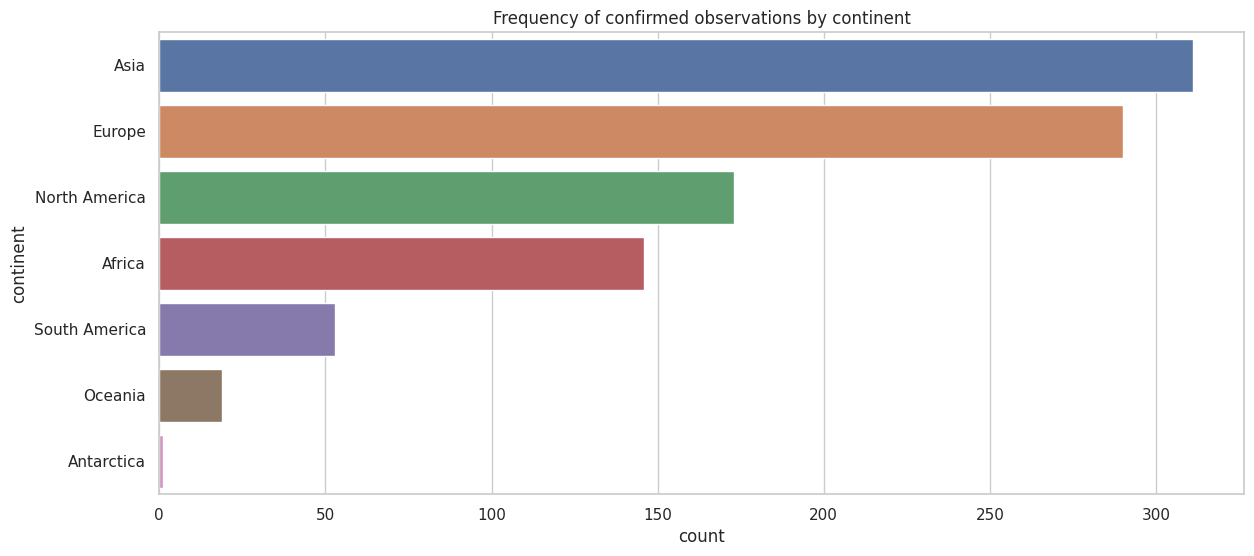

In [11]:
sns.set(rc={"figure.figsize":(14, 6)})

#set the grid style
sns.set(style="whitegrid")

sns.barplot(x = freq_by_continent['count'], y = freq_by_continent['continent'], orient = 'h').set(title = 'Frequency of confirmed observations by continent')

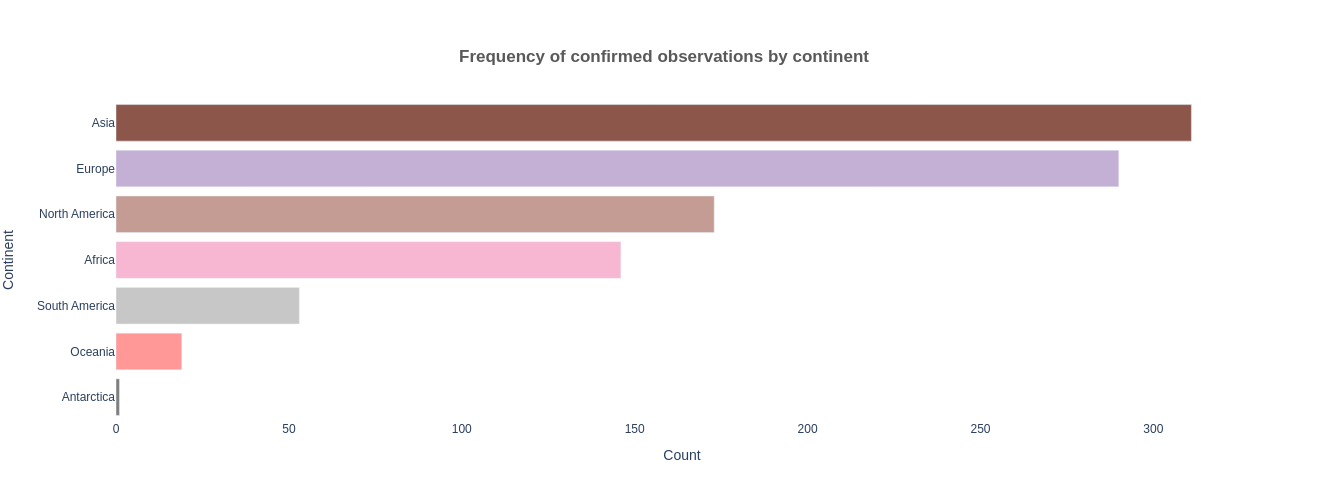

In [12]:
#repeat the above plot in plotly for the dashboard

import plotly.graph_objects as go

#Tableau 10 Pallete
# tableau10 = ['rgb(114, 158, 206)', 'rgb(255, 158, 74)', 'rgb(103, 191, 92)',
#           'rgb(237, 102, 93)', 'rgb(173, 139, 201)', 'rgb(168, 120, 110)',
#           'rgb(237, 151, 202)', 'rgb(162, 162, 162)', 'rgb(205, 204, 93)',
#           'rgb(109, 204, 218)']

# # Tableau 20 Colors
# tableau20 = ['rgb(31, 119, 180)', 'rgb(174, 199, 232)', 'rgb(255, 127, 14)', 'rgb(255, 187, 120)',  
#              'rgb(44, 160, 44)', 'rgb(152, 223, 138)', 'rgb(214, 39, 40)', 'rgb(255, 152, 150)',  
#              'rgb(148, 103, 189)', 'rgb(197, 176, 213)', 'rgb(140, 86, 75)', 'rgb(196, 156, 148)',  
#              'rgb(227, 119, 194)', 'rgb(247, 182, 210)', 'rgb(127, 127, 127)', 'rgb(199, 199, 199)',  
#              'rgb(188, 189, 34)', 'rgb(219, 219, 141)', 'rgb(23, 190, 207)', 'rgb(158, 218, 229)']
             
# # Tableau Color Blind 10
# tableau20blind = ['rgb(0, 107, 164)', 'rgb(255, 128, 14)', 'rgb(171, 171, 171)', 'rgb(89, 89, 89)',
#              'rgb(95, 158, 209)', 'rgb(200, 82, 0)', 'rgb(137, 137, 137)', 'rgb(163, 200, 236)',
#              'rgb(255, 188, 121)', 'rgb(207, 207, 207)']


#Tableau 20
colors = ['rgb(140, 86, 75)', 'rgb(197, 176, 213)', 'rgb(196, 156, 148)', 'rgb(247, 182, 210)',
          'rgb(199, 199, 199)', 'rgb(255, 152, 150)', 'rgb(127, 127, 127)']

fig = go.Figure(go.Bar(
            x=freq_by_continent['count'],
            y=freq_by_continent['continent'],
            orientation='h',
            marker=dict(color=freq_by_continent['continent'].map(dict(zip(freq_by_continent['continent'].unique(), colors))))
        ))

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title=dict(text='<b>Frequency of confirmed observations by continent</b>', x=0.5, y=0.9),
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Count',
    yaxis_title='Continent',
    yaxis=dict(autorange="reversed"),
    height=500, width=1000
)

fig.show()

In [13]:
#get the number of observed falls by country
fell_df.groupby(['country'])['name'].nunique().sort_values(ascending=False).head(5)

country
United States         138
India                 116
China                  58
Russian Federation     40
France                 40
Name: name, dtype: int64

In [14]:
freq_by_country = fell_df.groupby(['country'])['name'].nunique().sort_values(ascending = False).reset_index(name="count")
print()
print('\033[1m' + 'Total number of countries with confirmed observations' + '\033[0m')
print(freq_by_country.shape[0])
print()
print('\033[1m' + 'Number of countries with less than 3 confirmedd observations' + '\033[0m')
print(freq_by_country[freq_by_country['count'] <= 3].shape[0])


Total number of countries with confirmed observations
106

Number of countries with less than 3 confirmedd observations
53


It can be observed from above that almost half of the countries with confirmed observations have 3 or less reported events. 

In [15]:
#subset the top 10 countries for most confirmed observations
most_frequent_by_country = freq_by_country.iloc[0:10]

print()
print('\033[1m' + 'The Top 10 Countries with the highest number of confirmed observations' + '\033[0m')
print()

most_frequent_by_country.to_csv('./Data/most_frequent_by_country.csv')

print(most_frequent_by_country)
print()


The Top 10 Countries with the highest number of confirmed observations

              country  count
0       United States    138
1               India    116
2               China     58
3  Russian Federation     40
4              France     40
5               Japan     37
6           Argentina     24
7             Germany     24
8             Ukraine     23
9              Brazil     22



[Text(0.5, 1.0, 'Top 10 Countries with Confirmed Observations')]

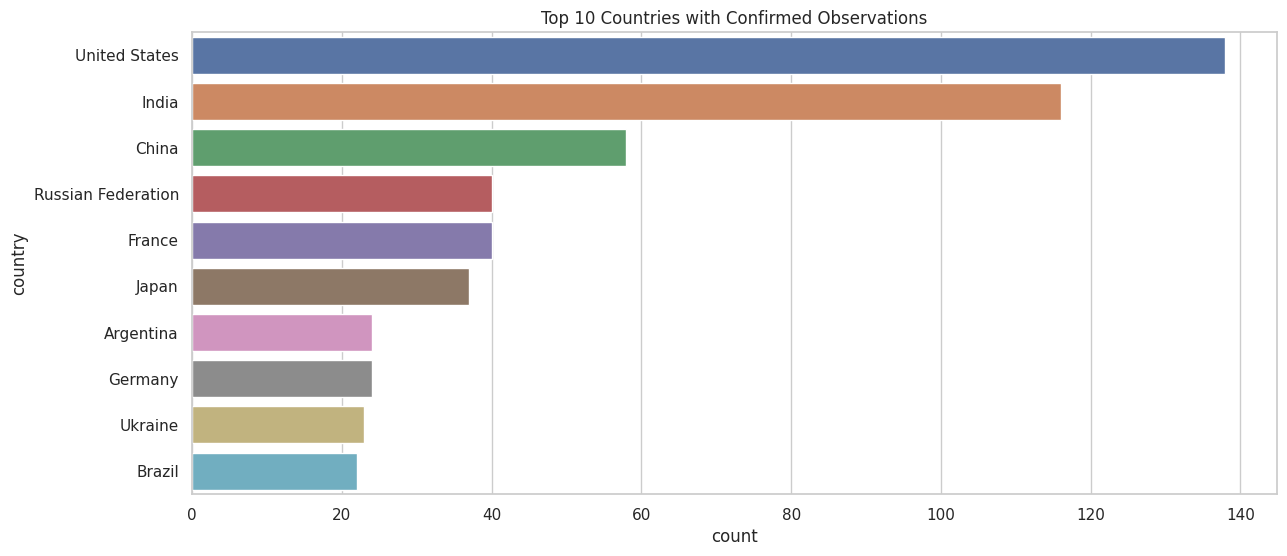

In [16]:
sns.set(rc={"figure.figsize":(14, 6)})

#set the grid style
sns.set(style="whitegrid")

sns.barplot(x = most_frequent_by_country['count'], y = most_frequent_by_country['country'], orient = 'h').set(title = 'Top 10 Countries with Confirmed Observations')

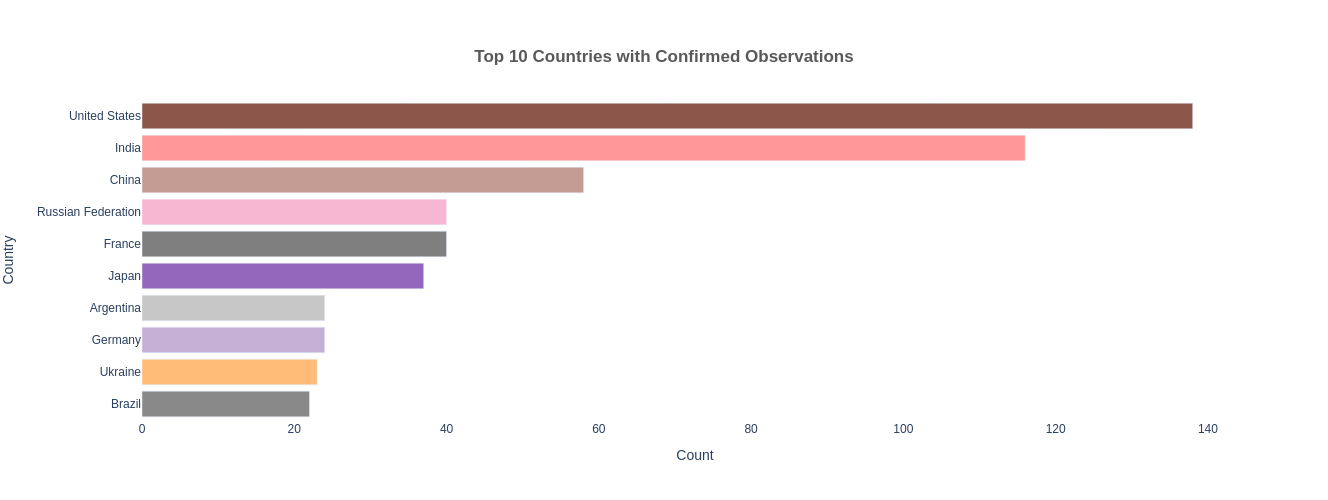

In [17]:
#recreate the chart above for the dashboard

#Tableau 20
colors = ['rgb(140, 86, 75)', 'rgb(255, 152, 150)', 'rgb(196, 156, 148)', 'rgb(247, 182, 210)', 
          'rgb(127, 127, 127)', 'rgb(148, 103, 189)', 'rgb(199, 199, 199)', 'rgb(197, 176, 213)',  
          'rgb(255, 188, 121)', 'rgb(137, 137, 137)'] 
           

fig = go.Figure(go.Bar(
            x=most_frequent_by_country['count'],
            y=most_frequent_by_country['country'],
            orientation='h',
            marker=dict(color=most_frequent_by_country['country'].map(dict(zip(most_frequent_by_country['country'].unique(), colors))))
        ))
fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title=dict(text='<b>Top 10 Countries with Confirmed Observations</b>', x=0.5, y=0.9),
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Count',
    yaxis_title='Country',
    yaxis=dict(autorange="reversed"),
    height=500, width=1000
)
fig.show()

In [18]:
grouped_by_region = fell_df.groupby(['continent', 'country'])['name'].count().sort_values(ascending = False).reset_index(name = 'count')

grouped_by_region.head()

continent             country  count
0  North America       United States    138
1           Asia               India    116
2           Asia               China     58
3         Europe  Russian Federation     40
4         Europe              France     40

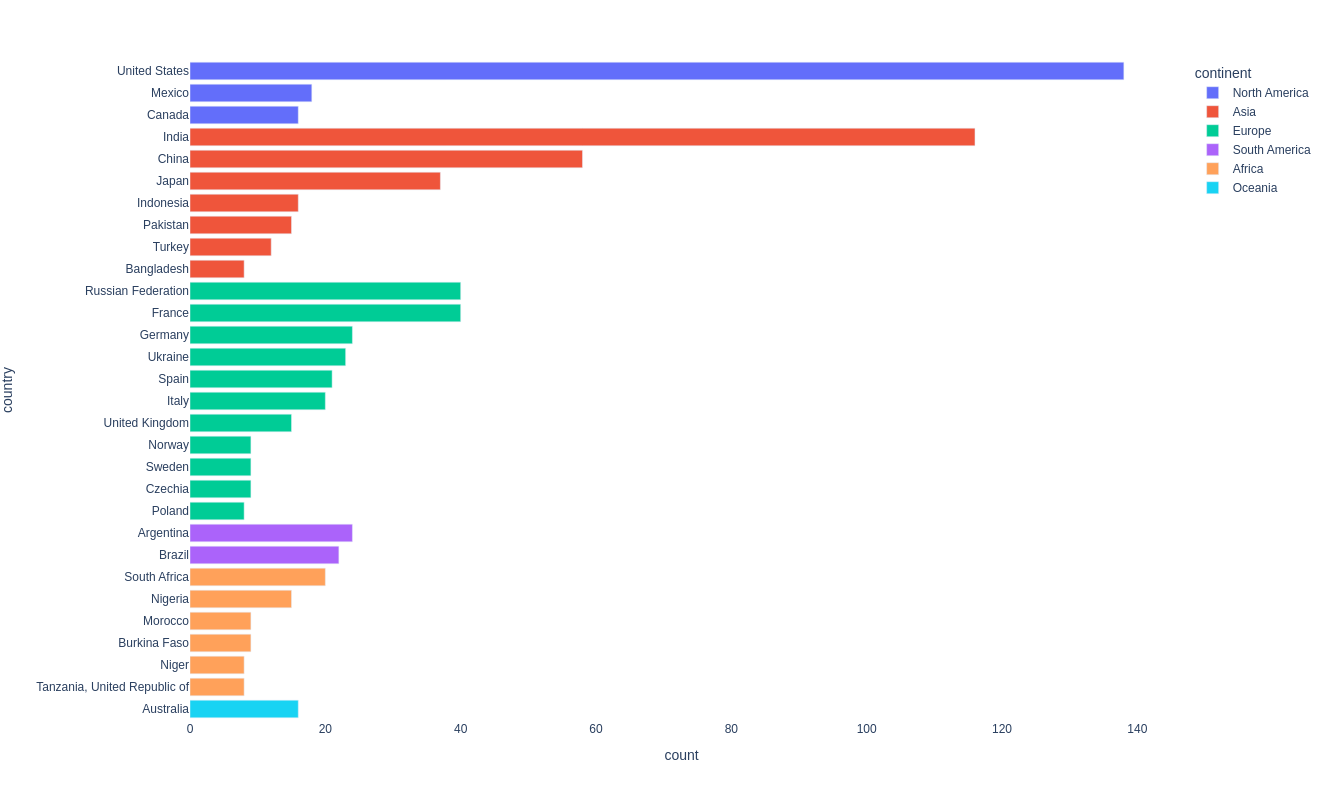

In [19]:
fig = px.bar(grouped_by_region.iloc[0:30], x = 'count', y = 'country', 
             hover_data=['continent', 'country', 'count'], color = 'continent', hover_name = 'country', orientation = 'h')
#fig.update_traces(marker = dict(color = 'rgba(50, 171, 96, 0.6)', 
                         #line = dict(color = 'rgba(50, 171, 96, 1.0)', width=1),))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'}, yaxis=dict(autorange="reversed"),
                 height=800, width=500)



fig.show()

In [18]:
europe = grouped_by_region[grouped_by_region['continent'] == 'Europe'].sort_values(by='count', ascending=False)
asia = grouped_by_region[grouped_by_region['continent'] == 'Asia'].sort_values(by='count', ascending=False)
north_america = grouped_by_region[grouped_by_region['continent'] == 'North America'].sort_values(by='count', ascending=False)
africa = grouped_by_region[grouped_by_region['continent'] == 'Africa'].sort_values(by='count', ascending=False)
south_america = grouped_by_region[grouped_by_region['continent'] == 'South America'].sort_values(by='count', ascending=False)
oceania = grouped_by_region[grouped_by_region['continent'] == 'Oceania'].sort_values(by='count', ascending=False)
antarctica = grouped_by_region[grouped_by_region['continent'] == 'Antarctica'].sort_values(by='count', ascending=False)


In [19]:
antarctica.head()

Empty DataFrame
Columns: [continent, country, count]
Index: []

In [20]:
europe.head()

continent             country  count
2    Europe              France     63
4    Europe  Russian Federation     48
6    Europe             Germany     32
7    Europe               Italy     31
8    Europe             Ukraine     31

In [20]:
freq_by_year = fell_df.groupby(['year'])['name'].nunique().reset_index(name="count")

freq_by_year.head()

year  count
0  1830.0      2
1  1831.0      2
2  1833.0      1
3  1834.0      2
4  1835.0      2

<Axes: xlabel='year', ylabel='count'>

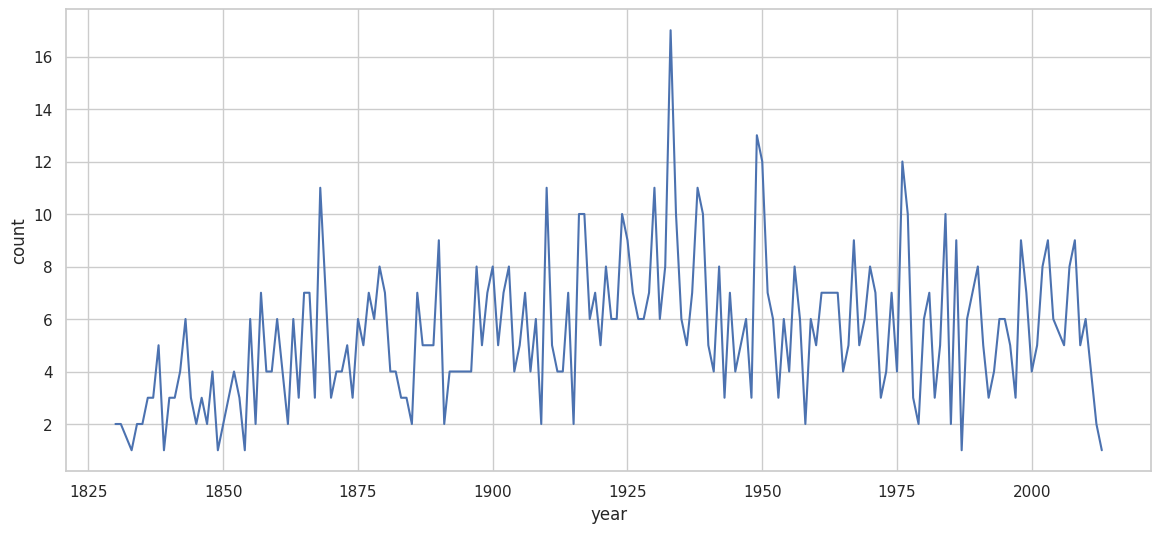

In [21]:
#set the grid style
sns.set(style="whitegrid")


sns.lineplot(data=freq_by_year, x = 'year', y = 'count')

In [22]:
freq_by_year_200 = freq_by_year[(freq_by_year['year'] >= 1830) & (freq_by_year['year'] <= 2015)]

freq_by_year_200.to_csv('./Data/freq_by_year_200.csv')

freq_by_year_200.head(20)

year  count
0   1830.0      2
1   1831.0      2
2   1833.0      1
3   1834.0      2
4   1835.0      2
5   1836.0      3
6   1837.0      3
7   1838.0      5
8   1839.0      1
9   1840.0      3
10  1841.0      3
11  1842.0      4
12  1843.0      6
13  1844.0      3
14  1845.0      2
15  1846.0      3
16  1847.0      2
17  1848.0      4
18  1849.0      1
19  1850.0      2

In [23]:
freq_by_year_200["count"].mean()

5.486187845303867

In [24]:
freq_by_year_200['count'].describe()

count    181.000000
mean       5.486188
std        2.684540
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       17.000000
Name: count, dtype: float64

It can be seen that the total number of years examined is 181 so the use of '200' in the name of the dataframes should not be taken ad literam. 

In [25]:
year_of_max_obs = freq_by_year_200['year'][freq_by_year_200['count'] == max(freq_by_year_200['count'])]

print()
print('\033[1m' + 'The year with the maximum number of observations is: ' + '\033[0m' + str(int(year_of_max_obs)))
print()
print('\033[1m' + 'The number of recorded observations in 1933 was: ' + '\033[0m' + str(int(max(freq_by_year_200['count']))))
print()
print('\033[1m' + 'On average there are about 5 sightings per year. ' + '\033[0m')
print()



The year with the maximum number of observations is: 1933

The number of recorded observations in 1933 was: 17

On average there are about 5 sightings per year. 



/tmp/ipykernel_1491863/2156538973.py:4: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



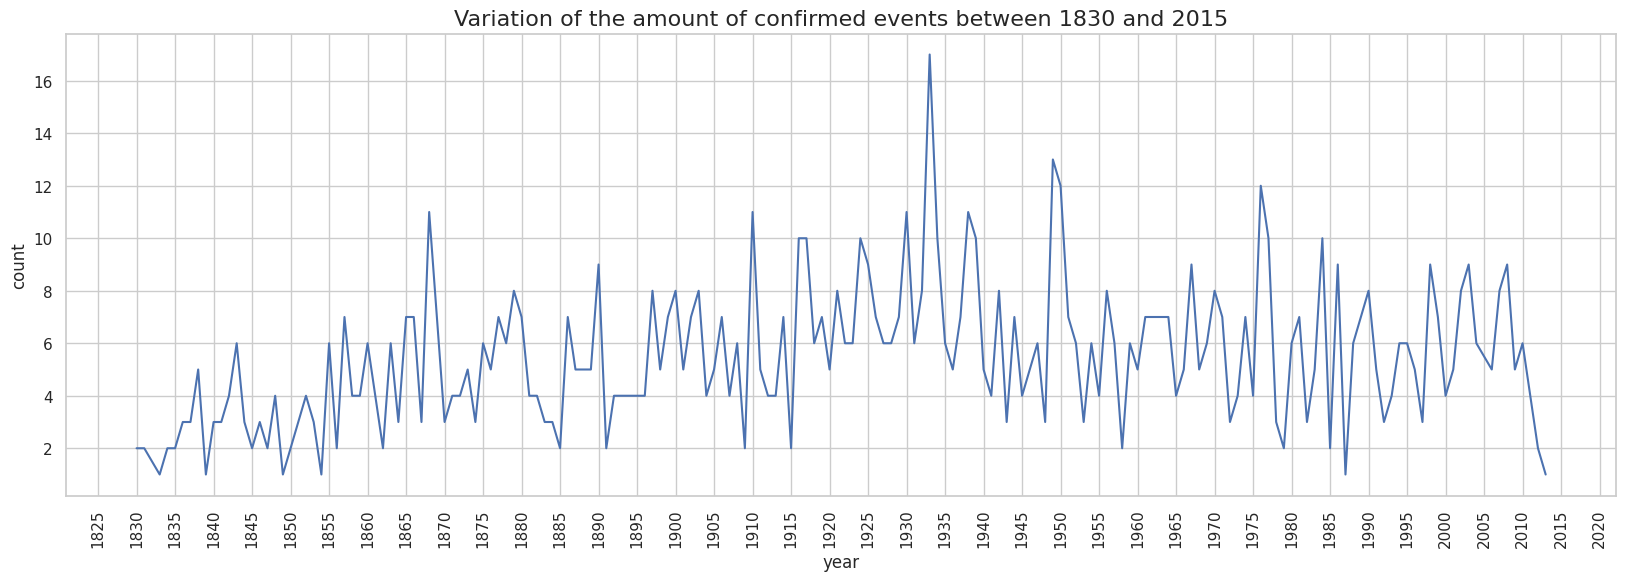

In [26]:
#set figure size
sns.set(rc={"figure.figsize":(20, 6)})

#set the grid style
sns.set(style="whitegrid")

#define the plot
ax = sns.lineplot(data=freq_by_year_200, x = 'year', y = 'count', linewidth = 1.5)

#set the title
ax.set_title('Variation of the amount of confirmed events between 1830 and 2015', fontdict={'fontsize': 16, 'fontweight': 'medium'})

#format the ticks to match each decade and rotate the labels
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.tick_params(axis='x', rotation=90)

plt.show()

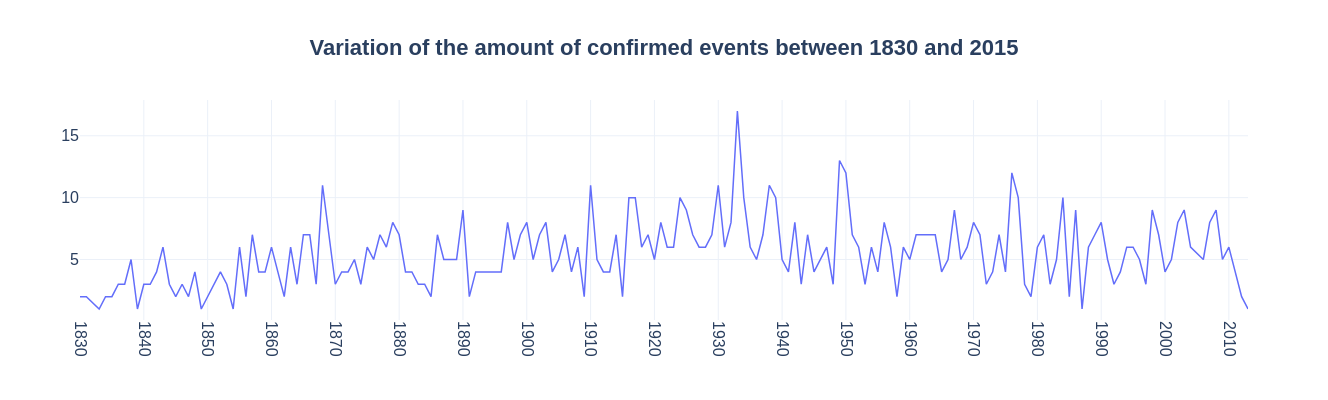

In [27]:
#recreate the graph above using plotly for web app compatibility
import plotly.graph_objects as go

# define the figure size
fig = go.Figure()
fig.update_layout(width=1200, height=400)

# set the grid style
fig.update_layout(template='plotly_white')

# define the plot
fig.add_trace(go.Scatter(x=freq_by_year_200['year'], y=freq_by_year_200['count'], mode='lines', line=dict(width=1.5)))

# set the title
fig.update_layout(title=dict(text='<b>Variation of the amount of confirmed events between 1830 and 2015</b>', x=0.5, y=0.9), font=dict(size=16))

# format the ticks to match each decade and rotate the labels
fig.update_xaxes(tickmode='linear', tick0=1830, dtick=10)
fig.update_xaxes(tickangle=90)

fig.show()




In [28]:
#add a 'decade' column to associate each year with it's corresponding decade
#this will provide a 'cleaner' overview of the observation frequency timeline 
fell_df['decade'] = [ int(np.floor(year/10) * 10) for year in np.array(fell_df["year"])]

#group the events by the new 'decade' column
grouped_by_decade = fell_df.groupby(['decade'])['name'].nunique().reset_index(name="count")

#preview the set
grouped_by_decade.tail()

decade  count
14    1970     60
15    1980     56
16    1990     56
17    2000     59
18    2010     13

<Axes: xlabel='decade', ylabel='count'>

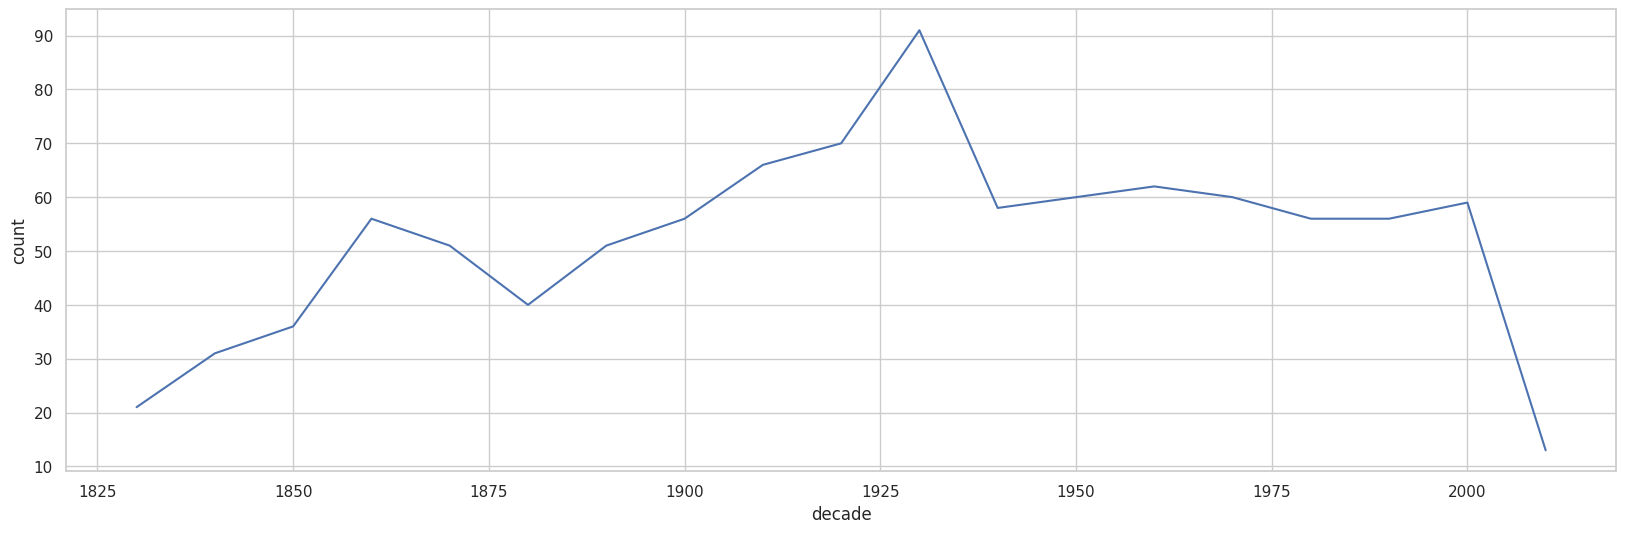

In [29]:
#the evolution of meteor observations grouped by decade
sns.lineplot(data=grouped_by_decade, x = 'decade', y = 'count')

In [30]:
#subset the data to focus on the past two centuries
grouped_by_decade_200 = grouped_by_decade[(grouped_by_decade['decade'] >= 1830) & (grouped_by_decade['decade'] < 2010)]

#preview the set
grouped_by_decade_200.head(20)

decade  count
0     1830     21
1     1840     31
2     1850     36
3     1860     56
4     1870     51
5     1880     40
6     1890     51
7     1900     56
8     1910     66
9     1920     70
10    1930     91
11    1940     58
12    1950     60
13    1960     62
14    1970     60
15    1980     56
16    1990     56
17    2000     59

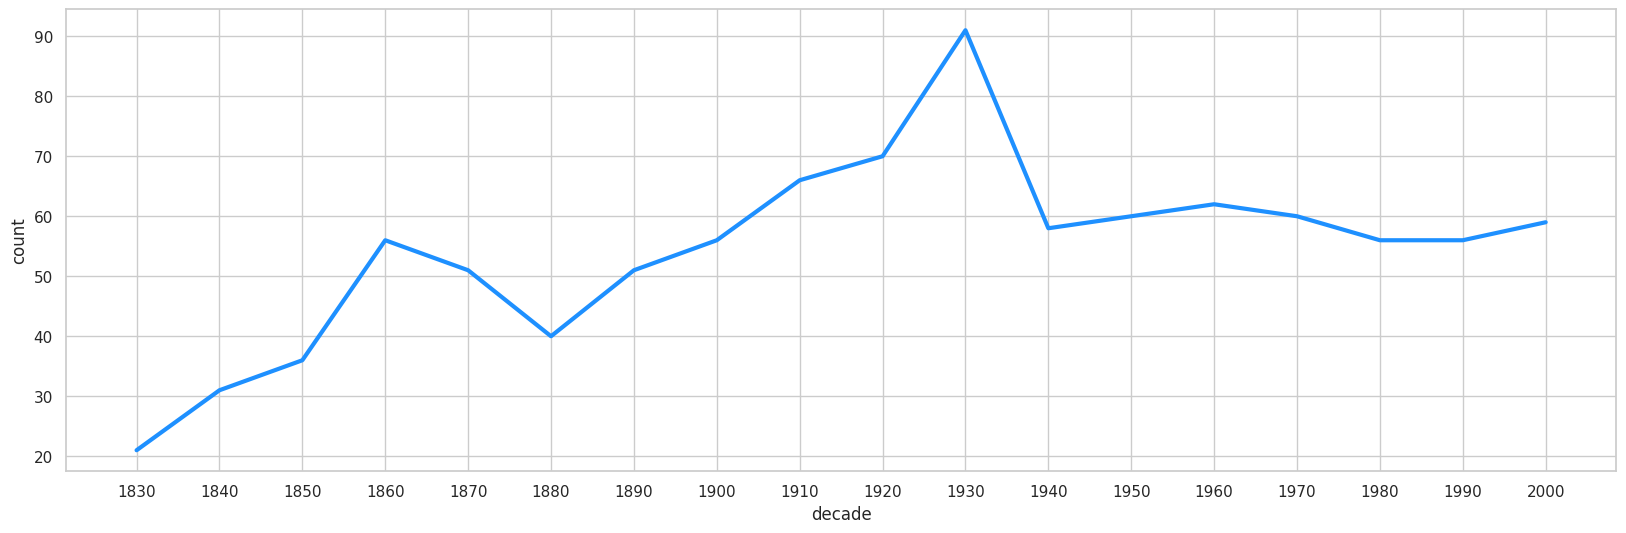

In [31]:
#set the grid style
sns.set(style="whitegrid")

#define the plot
ax = sns.lineplot(data=grouped_by_decade_200, x = 'decade', y = 'count', color = '#1E90FF', linewidth = 3)

#format the ticks to match each decade
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

There appears to be a spike in the 1860s but the level is under the almost constant level of the last 7 decades which might indicate that the observations became more consistent in the second half of the 20th century.   

In [32]:
grouped_by_decade_200.tail()

decade  count
13    1960     62
14    1970     60
15    1980     56
16    1990     56
17    2000     59

In [33]:
grouped_by_decade_200 = grouped_by_decade_200.assign(avg_per_year = lambda x: (x['count'] / 10)).round(0)

grouped_by_decade_200.to_csv('./Data/grouped_by_decade_200.csv')

In [34]:
grouped_by_decade_200.head()

decade  count  avg_per_year
0    1830     21           2.0
1    1840     31           3.0
2    1850     36           4.0
3    1860     56           6.0
4    1870     51           5.0

In [35]:
#calculate the mean count of observations per decade
grouped_by_decade_200["count"].mean()

54.44444444444444

In [36]:
#alternative method to calculate the average per year per decade

#group by decade
grouped_by_decade_year = fell_df.groupby(['decade', 'year'])['name'].nunique().reset_index(name="count")
#calculate the average falls per year per decade
grouped_by_decade_year_avg = grouped_by_decade_year.groupby(['decade'])['count'].mean().reset_index(name = 'avg/year')
#apply rounding to the average column
grouped_by_decade_year_avg['avg/year'] = grouped_by_decade_year_avg['avg/year'].round(0)
#subset the data to focus on the past two centuries
grouped_by_decade_year_avg = grouped_by_decade_year_avg[(grouped_by_decade_year_avg['decade'] >= 1830) & (grouped_by_decade_year_avg['decade'] < 2010)]

In [37]:
display(grouped_by_decade_year_avg.head())
grouped_by_decade_year_avg.to_csv('./Data/grouped_by_decade_year_avg.csv')

decade  avg/year
0    1830       2.0
1    1840       3.0
2    1850       4.0
3    1860       6.0
4    1870       5.0

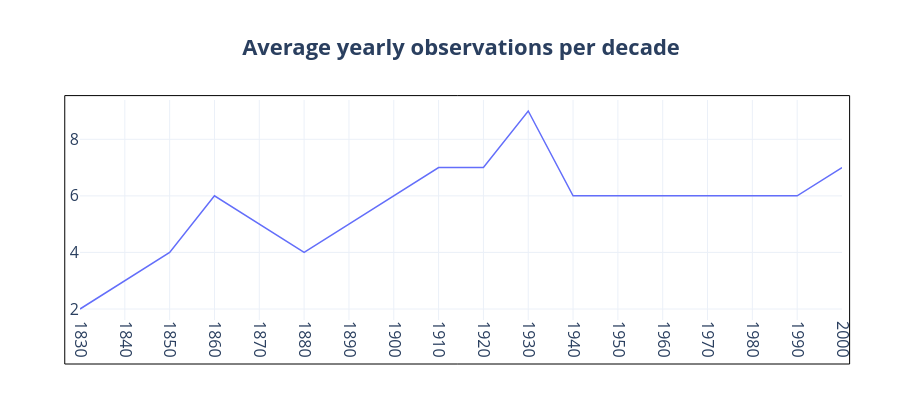

In [38]:
#plot the yearly avg by decade
#recreate the graph above using plotly for web app compatibility
import plotly.graph_objects as go

# define the figure size
fig = go.Figure()
fig.update_layout(width=1200, height=400)

# set the grid style
fig.update_layout(template='plotly_white')

# define the plot
fig.add_trace(go.Scatter(x=grouped_by_decade_year_avg['decade'], y=grouped_by_decade_year_avg['avg/year'], mode='lines', line=dict(width=1.5)))

# set the title
fig.update_layout(title=dict(text='<b>Average yearly observations per decade</b>', 
                             x=0.5, y=0.9), 
                  font=dict(size=16),
                  shapes=[go.layout.Shape(
                            type='rect',
                            xref='paper',
                            yref='paper',
                            x0=-0.02,
                            y0=-0.2,
                            x1=1.01,
                            y1=1.02,
                            line={'width': 1, 'color': 'black'}
                            )]
                 
                 
                 )

# format the ticks to match each decade and rotate the labels
fig.update_xaxes(tickmode='linear', tick0=1830, dtick=10)
fig.update_xaxes(tickangle=90)

fig.show()

In [39]:
grouped_by_decade_200['avg_per_year'].describe()

count    18.000000
mean      5.555556
std       1.580105
min       2.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000
Name: avg_per_year, dtype: float64

From the summary above it can be seen that the average number of observed falls per year corresponds to our "per year" summary above, i.e. 5, but the minimum average annual count per decade is 2 and the maximum annual average count is 9. Next, we'll repeat the same summary for the count per decade to figure how the spikes compare to the average count per decade such that we don't conclude that each spike is out of the ordinary rather than corresponding to variations in the reporting and recording of the data. 

In [40]:
grouped_by_decade_200['count'].describe()

count    18.000000
mean     54.444444
std      15.557189
min      21.000000
25%      51.000000
50%      56.000000
75%      60.000000
max      91.000000
Name: count, dtype: float64

Now, comparing the summary above with the graph below we notice that the spike of the 1860s falls exactly on the median and therefore there is a possibility that the lower rates of the preceding and following decades is due to the inconsistent recording of the events. Thus, the only 'unusual' trend over the decades corresponds to the 30s where we find the maximum number of recovered falls per decade i.e. 91 observed and recovered meteorites.  

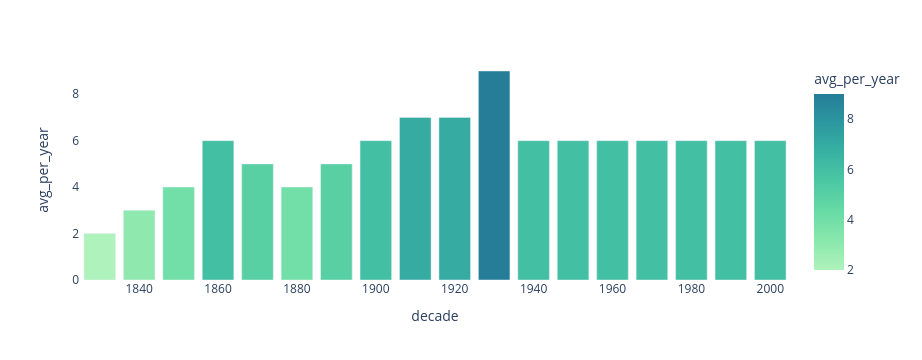

In [41]:
fig = px.bar(grouped_by_decade_200, x = 'decade', y = 'avg_per_year',
             hover_data=['decade', 'count', 'avg_per_year'], color='avg_per_year', hover_name = 'decade', 
             color_continuous_scale = 'Tealgrn')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.show()


From the graph above there is one outstanding spike for the decade of the 1930s, with higher than average observations. The focus of the next inquiries will be in determining if the spike can be related to specific regions and possible meteor storm events.  

In [42]:
df_1930 = fell_df[fell_df['decade'] == 1930]

df_1930.head()

name    id       Type group  mass (g)    year  latitude  longitude  \
7   Aguada   398  Chondrite    L6    1620.0  1930.0 -31.60000  -65.23333   
32  Andura  2298  Chondrite    H6   17900.0  1939.0  20.88333   76.86667   
39  Archie  2329  Chondrite    H6    5070.0  1932.0  38.50000  -94.30000   
46  Athens  4885  Chondrite   LL6     265.0  1933.0  34.75000  -87.00000   
56   Aztec  4913  Chondrite    L6    2830.0  1938.0  36.80000 -108.00000   

          country      continent country code  area(sq Km)  decade  
7       Argentina  South America          ARG    2736690.0    1930  
32          India           Asia          IND    2973190.0    1930  
39  United States  North America          USA    9147420.0    1930  
46  United States  North America          USA    9147420.0    1930  
56  United States  North America          USA    9147420.0    1930

In [43]:
df_1930.shape[0]

91

In [44]:
fell_df.shape[0]

993

In [45]:
print()
print("The percentage of the total events that were observed in 1930 is:", round(len(df_1930.index) / len(fell_df.index) * 100, 4), '%')
print()


The percentage of the total events that were observed in 1930 is: 9.1641 %



In [46]:
grouped_by_region_1930 = df_1930.groupby(['continent', 'country'])['name'].count().sort_values(ascending = False).reset_index(name = 'count')

grouped_by_region_1930.head(15)

continent                       country  count
0   North America                 United States     18
1          Europe            Russian Federation     10
2   South America                     Argentina      6
3            Asia                         India      5
4          Europe                       Ukraine      4
5            Asia                     Indonesia      4
6            Asia                         China      3
7            Asia                    Kazakhstan      3
8          Europe                        Sweden      2
9            Asia                       Myanmar      2
10  South America                        Brazil      2
11           Asia                    Bangladesh      2
12        Oceania                     Australia      2
13         Africa  Tanzania, United Republic of      2
14         Africa                  South Africa      2

Countries have varying spans and population densities so it makes more sense to compare continents for number of observations rather than individual countries. Differences between countries even when located on the same continent might indicate variability of certain local characteristics such as the implementation of monitoring systems or an increase in interest in the field following a major event such as the "Surprise Shower" of October 9, 1933.  

In [47]:
grouped_by_continent_1930 = df_1930.groupby(['continent'])['name'].count().sort_values(ascending = False).reset_index(name = 'count')

grouped_by_continent_1930.head(7)

continent  count
0         Europe     26
1           Asia     24
2  North America     20
3         Africa     10
4  South America      8
5        Oceania      3

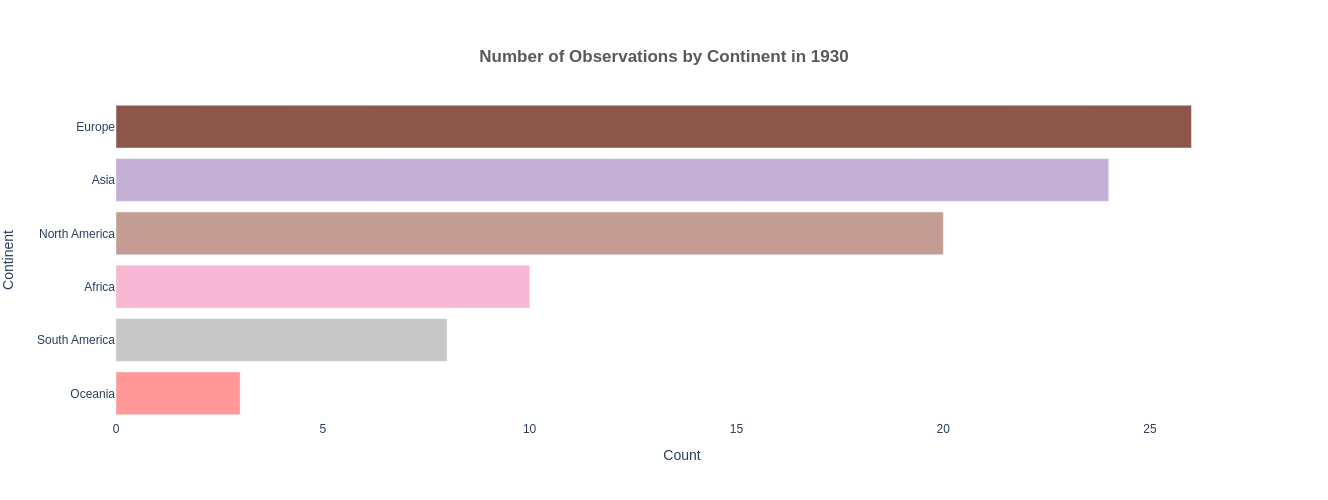

In [48]:
#Tableau 20
colors = ['rgb(140, 86, 75)', 'rgb(197, 176, 213)', 'rgb(196, 156, 148)', 'rgb(247, 182, 210)',
          'rgb(199, 199, 199)', 'rgb(255, 152, 150)', 'rgb(127, 127, 127)']

fig = go.Figure(go.Bar(
            x=grouped_by_continent_1930['count'],
            y=grouped_by_continent_1930['continent'],
            orientation='h',
            marker=dict(color=grouped_by_continent_1930['continent'].map(dict(zip(grouped_by_continent_1930['continent'].unique(), colors))))
        ))

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title=dict(text='<b>Number of Observations by Continent in 1930</b>', x=0.5, y=0.9),
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Count',
    yaxis_title='Continent',
    yaxis=dict(autorange="reversed"),
    height=500, width=1000
)


fig.show()

The bar chart shows a similar pattern as the chart over all the decades with most confirmed sightings coming from Europe followed by Asia and North America.   

In [49]:
df_1930.to_csv('1930_falls.csv')